## Importing libaries and getting DataFrame

In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "../../data/mc15_13TeV.361203.Pythia8_A2_MSTW2008LO_ND_minbias.30062015_v0_per_0.root"

In [3]:
file = uproot.open(path)
T = file['tree']
df = T.pandas.df("v0_rxy v0_chi2 cosTheta v0_la_mass trueLa".split(" "))

In [4]:
allstring=''
keys=[]
for key in T.keys():
    keys.append(str(key)[2:-1])
    allstring+=' '+str(key)[2:-1]
allstring=allstring[1:]
keys=keys[:57]
no_true=[]
no_true_split=''
for key in keys:
    if 'true' not in key:
        no_true.append(key)
        no_true_split+=' '+key
no_true_split=no_true_split[1:]
# no_true_split, allstring

In [5]:
df_all = T.pandas.df(no_true_split.split(" "), entrystop=10000)
df_all.head()

,eventCounter,npv,ntrk_pv0,pv0_x,pv0_y,pv0_z,a0xy,a0,a0z,cosTheta,...,epsilon2,Alpha,pL1,pL2,pT,thetastar,rapidity_ks,rapidity_la,rapidity_lb,pseudorapidity
entry,,,,,,,,,,,,,,,,,,,,,
0,2,1,62,0.028077,0.004393,32.790684,0.060672,0.133528,0.133528,0.999984,...,1.141602,-0.136422,786.687805,1035.237793,201.337692,1.731022,-0.312770,-0.253440,-0.261637,-0.324872
1,2,1,62,0.028077,0.004393,32.790684,0.757474,2.288277,2.288277,0.998978,...,0.480119,0.493348,1766.831909,599.436829,102.981972,0.817387,0.303715,0.275949,0.249427,0.308234
2,6,1,10,0.060272,-0.035856,-55.414871,0.352496,0.450838,0.450838,-0.976455,...,0.532330,-0.132327,474.564545,619.314148,206.017105,1.716129,-1.365487,-0.704677,-0.739866,-2.020412
3,7,1,26,-0.031177,0.036038,-51.024857,4.042985,5.507392,5.507392,0.981570,...,0.287154,-0.329501,815.854797,1617.719604,184.768997,1.975012,2.090197,1.196856,1.388051,2.612164
4,7,1,26,-0.031177,0.036038,-51.024857,4.279605,5.185442,5.185442,-0.814891,...,0.357001,0.587129,823.934875,214.335999,145.254715,0.851925,1.349868,0.764349,0.615697,1.967136


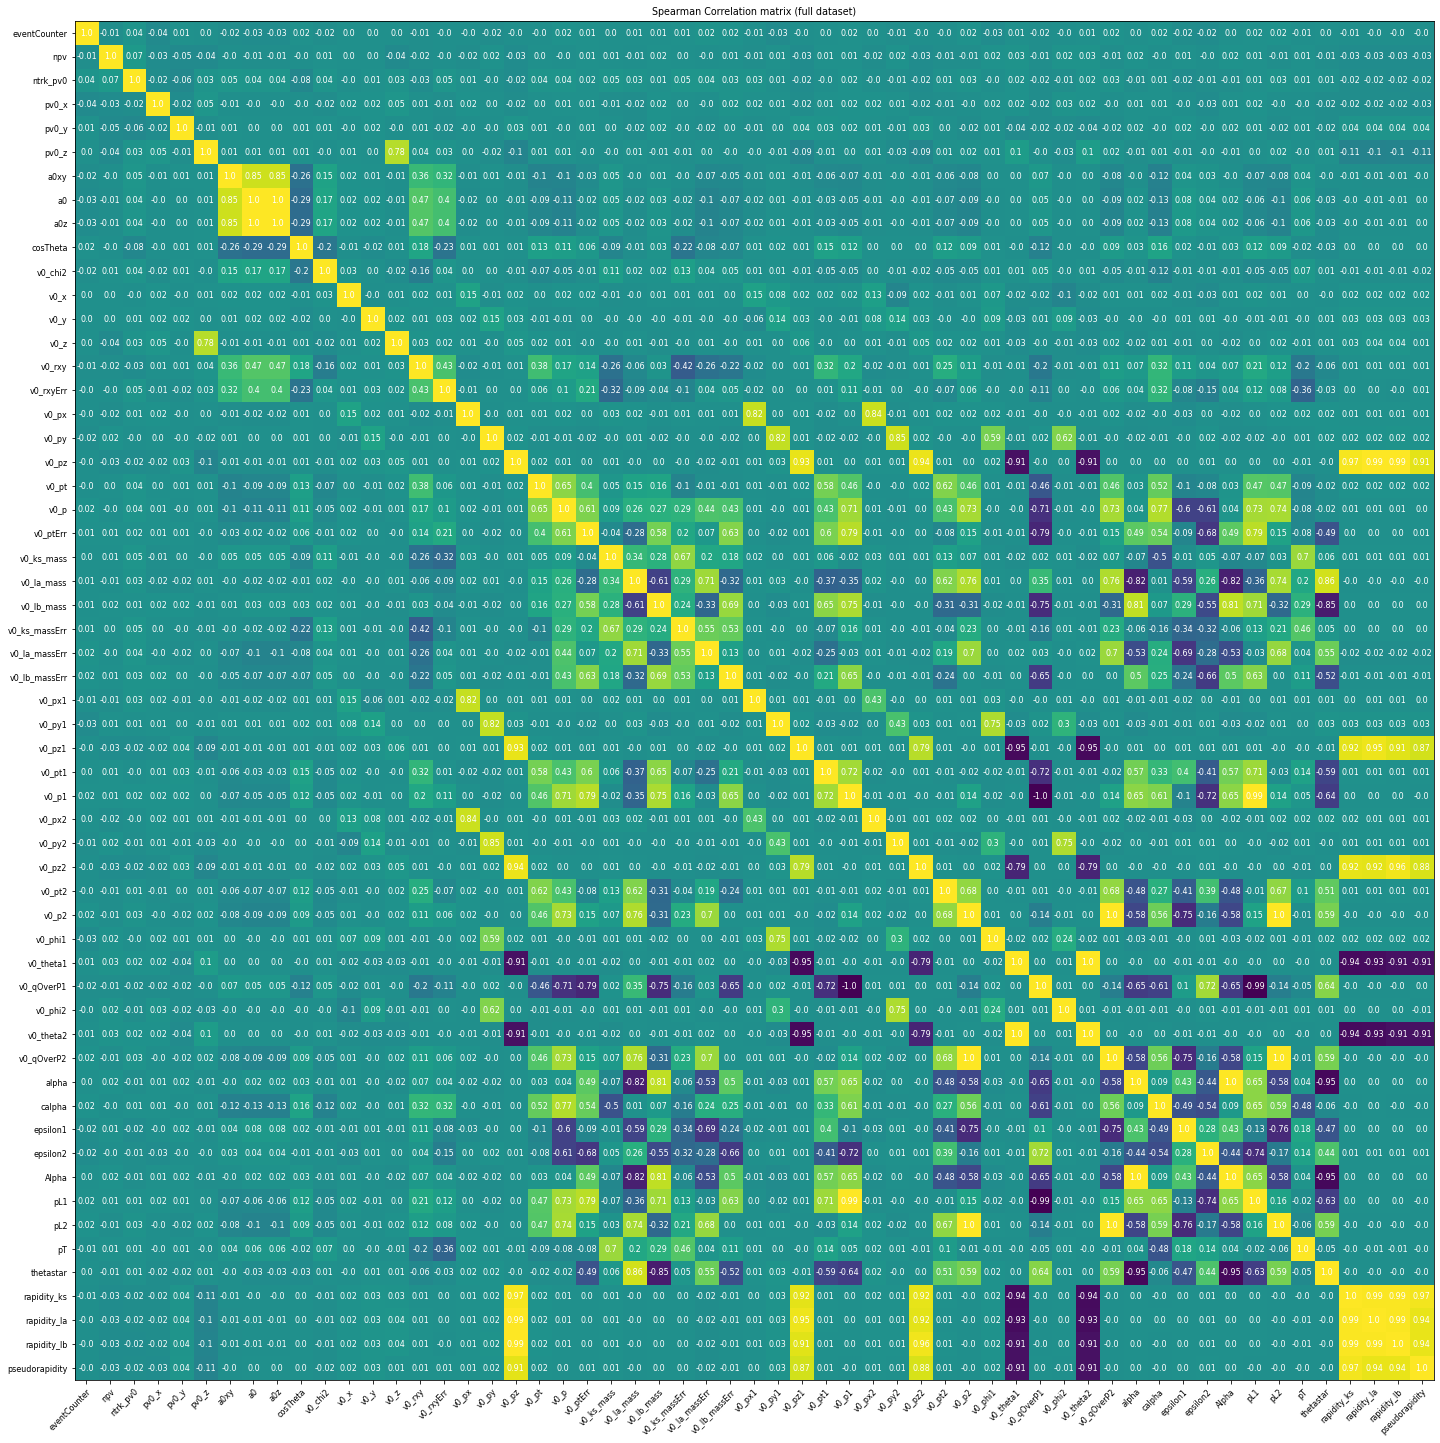

In [13]:
%matplotlib inline
plt.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(figsize=(25,25))
corr=df_all.corr(method='spearman')
im = ax.imshow(corr)

# We want to show all ticks...
ax.set_xticks(np.arange(len(df_all.columns)))
ax.set_yticks(np.arange(len(df_all.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(df_all.columns)
ax.set_yticklabels(df_all.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        text = ax.text(j, i, np.round(corr[df_all.columns[i]][df_all.columns[j]], 2),
                       ha="center", va="center", color="w")

ax.set_title("Spearman Correlation matrix (full dataset)")
# fig.tight_layout()
plt.savefig('Spearman Correlation.png')
plt.show()

In [14]:
df.head()

,v0_rxy,v0_chi2,cosTheta,v0_la_mass,trueLa
entry,,,,,
0,22.167784,2.382054,0.999984,1411.470215,0
1,47.610825,3.497677,0.998978,1141.442261,0
2,0.817319,0.498025,-0.976455,1351.726929,0
3,8.774105,0.005986,0.981570,1561.072388,0
4,6.396118,0.059769,-0.814891,1152.548218,0


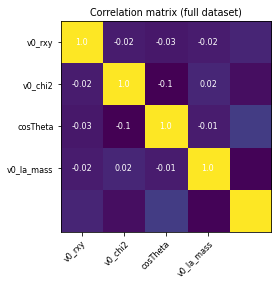

In [15]:
fig, ax = plt.subplots()
corr=df.corr()
im = ax.imshow(corr)

# We want to show all ticks...
ax.set_xticks(np.arange(len(df.columns)-1))
ax.set_yticks(np.arange(len(df.columns)-1))
# ... and label them with the respective list entries
ax.set_xticklabels(df.columns[:-1])
ax.set_yticklabels(df.columns[:-1])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(df.columns)-1):
    for j in range(len(df.columns)-1):
        text = ax.text(j, i, np.round(corr[df.columns[i]][df.columns[j]], 2),
                       ha="center", va="center", color="w")

ax.set_title("Correlation matrix (full dataset)")
fig.tight_layout()
plt.show()

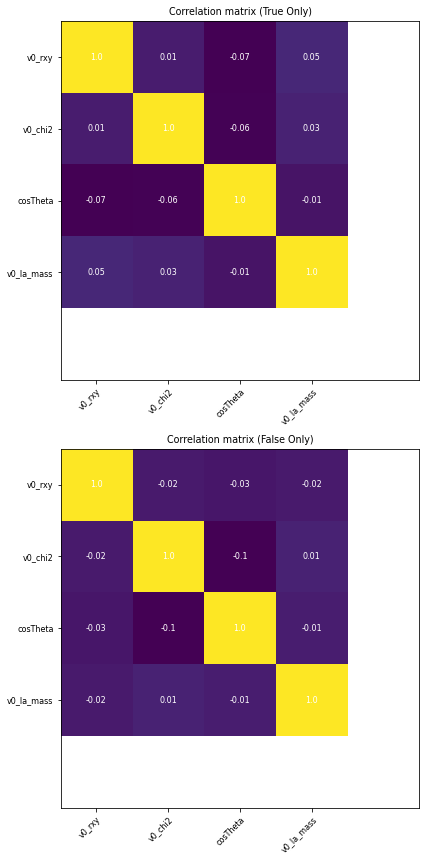

In [16]:
dft=df.loc[df['trueLa']==1]
fig, ax = plt.subplots(2, figsize=(6, 12))
corr=dft.corr()
im = ax[0].imshow(corr)

# We want to show all ticks...
ax[0].set_xticks(np.arange(len(df.columns)-1))
ax[0].set_yticks(np.arange(len(df.columns)-1))
# ... and label them with the respective list entries
ax[0].set_xticklabels(df.columns[:-1])
ax[0].set_yticklabels(df.columns[:-1])

# Rotate the tick labels and set their alignment.
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(df.columns)-1):
    for j in range(len(df.columns)-1):
        text = ax[0].text(j, i, np.round(corr[df.columns[i]][df.columns[j]], 2),
                       ha="center", va="center", color="w")
ax[0].set_title("Correlation matrix (True Only)")

dff=df.loc[df['trueLa']==0]
corr=dff.corr()
im = ax[1].imshow(corr)

# We want to show all ticks...
ax[1].set_xticks(np.arange(len(df.columns)-1))
ax[1].set_yticks(np.arange(len(df.columns)-1))
# ... and label them with the respective list entries
ax[1].set_xticklabels(df.columns[:-1])
ax[1].set_yticklabels(df.columns[:-1])

# Rotate the tick labels and set their alignment.
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(df.columns)-1):
    for j in range(len(df.columns)-1):
        text = ax[1].text(j, i, np.round(corr[df.columns[i]][df.columns[j]], 2),
                       ha="center", va="center", color="w")

ax[1].set_title("Correlation matrix (False Only)")
fig.tight_layout()
plt.show()

## Making plots to look at the data

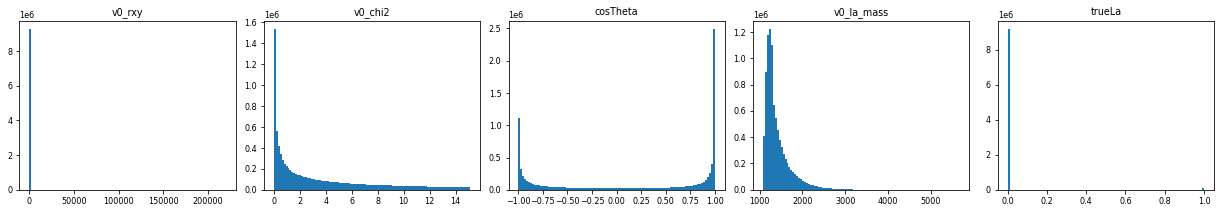

In [17]:
fig, ax = plt.subplots(ncols = 5, figsize = (17, 3))
bins = 100

# fig.suptitle("Hist of all data")

for i, col in enumerate(df.columns):
    ax[i].set_title(col)
    ax[i].hist(df[col], bins = bins)

fig.tight_layout()

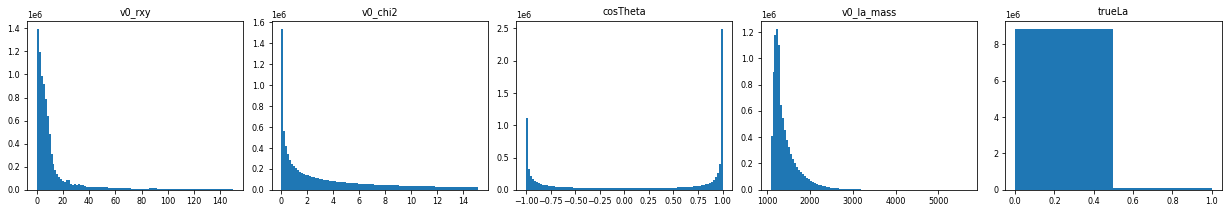

In [18]:
# Restrict v0_rxy to less than 150
cut_rxy = 150
df = df.loc[df["v0_rxy"] < cut_rxy]
ax[0].clear()
ax[0].set_title("v0_rxy")
ax[0].hist(df["v0_rxy"], bins = bins)


# Set bins of TrueKs to two
ax[4].clear()
ax[4].set_title("trueLa")
ax[4].hist(df["trueLa"], bins = 2)

#Draw plot
fig

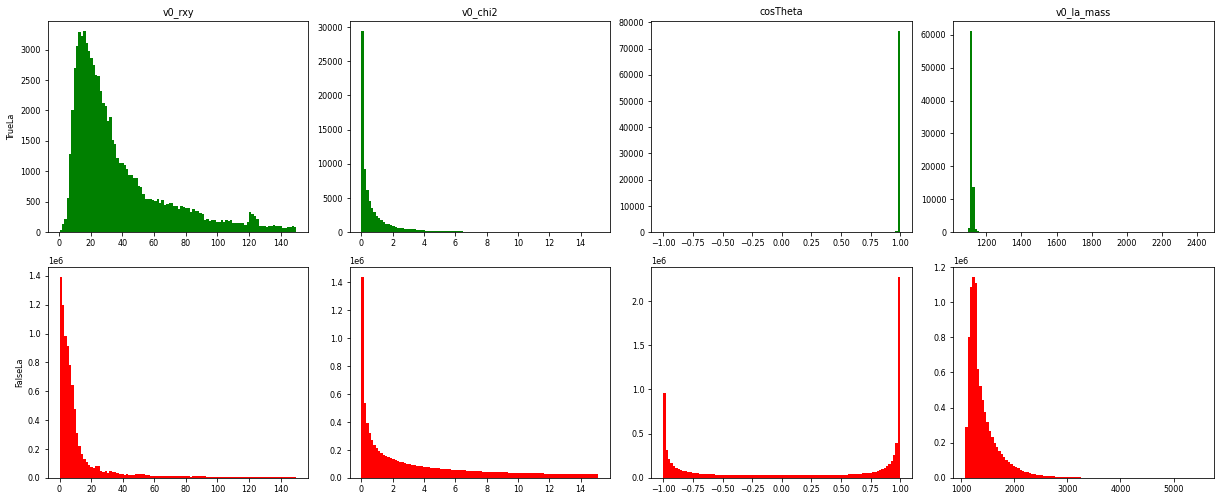

In [19]:
fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize = (17, 7))

plot_values = "v0_rxy v0_chi2 cosTheta v0_la_mass".split(" ") # Values to plot 
trueLa = df["trueLa"].astype(bool) # Identify true/false for Ks 

for i, col in enumerate(plot_values):
    ax[0][i].set_title(col)
    ax[0][i].hist(df[col].loc[trueLa], bins = bins, color = "green")
    ax[1][i].hist(df[col].loc[trueLa.apply(lambda x: not x)], bins = bins, color = "red")
    
ax[0][0].set_ylabel("TrueLa")
ax[1][0].set_ylabel("FalseLa")

fig.tight_layout()

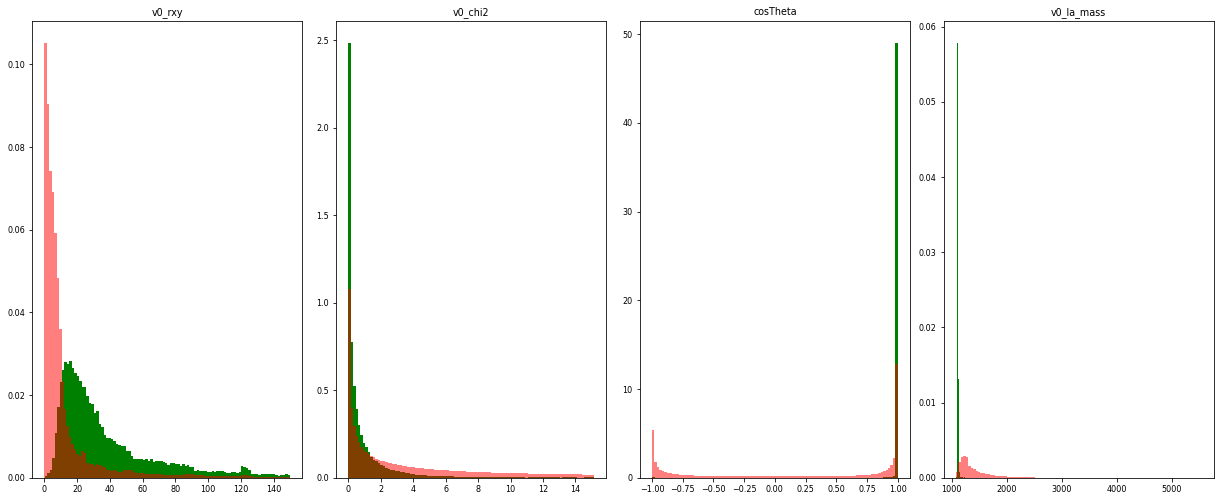

In [20]:
fig, ax = plt.subplots(ncols = 4, nrows = 1, figsize = (17, 7))

plot_values = "v0_rxy v0_chi2 cosTheta v0_la_mass".split(" ") # Values to plot 
trueLa = df["trueLa"].astype(bool) # Identify true/false for Ks 

for i, col in enumerate(plot_values):
    ax[i].set_title(col)
    ax[i].hist(df[col].loc[trueLa], bins = bins, color = "green", density=1)
    ax[i].hist(df[col].loc[trueLa.apply(lambda x: not x)], bins = bins, color = "red", alpha=0.5, density=1)

fig.tight_layout()

## Making cuts
First check the amount of trueLa, so we can see how much signal and background we're cutting

In [21]:
total_signal, total_background = df['trueLa'].sum(), (df['trueLa'] == 0).sum()
print(f"The total amount of signal events is:   {total_signal} \nand the amount of background events is: {total_background}")

print("Signal is {:.2f} %".format(total_signal/(total_background + total_signal) * 100))

The total amount of signal events is:   78185 
and the amount of background events is: 8829957
Signal is 0.88 %


We now make cuts for each variable

### v0_rxy
It is clear that we need to restrict to low values. Lets take a look at v0_rxy for < 150

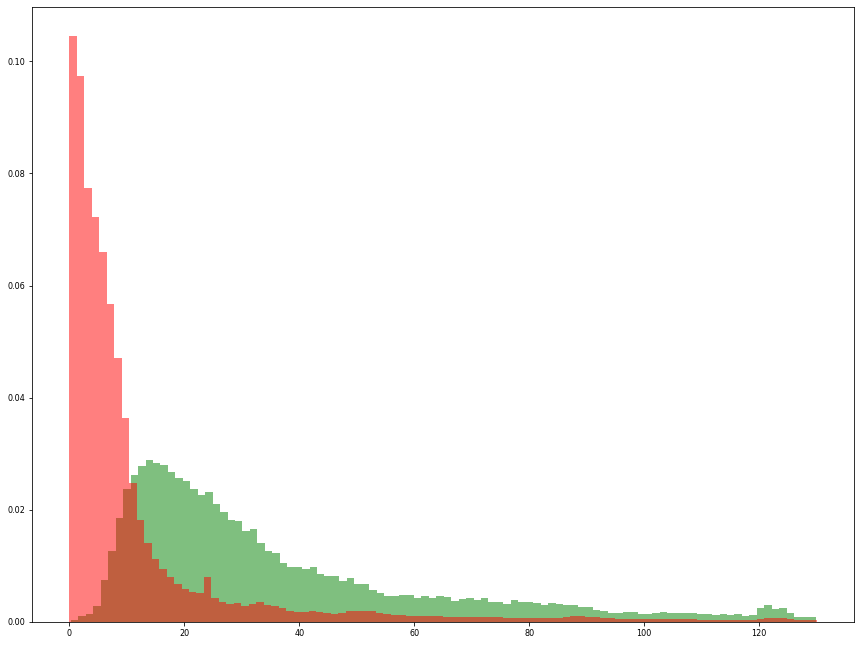

In [22]:
histdattrue=df.loc[np.logical_and(df['v0_rxy'] < 130, df['trueLa'] == 1)]
histdatfalse=df.loc[np.logical_and(df['v0_rxy'] < 130, df['trueLa'] == 0)]
fig, ax=plt.subplots(figsize=(12,9))
ax.hist(histdattrue['v0_rxy'], bins=100, color='g', density=1, alpha=0.5)
ax.hist(histdatfalse['v0_rxy'], bins=100, color='r', density=1, alpha=0.5)
fig.tight_layout()

We choose to cut between 7 and 60

In [23]:
dforig=df

In [24]:
cutup, cutlow=120,7
df = df.loc[np.logical_and(df['v0_rxy'] <cutup, df['v0_rxy'] > cutlow)]

In [25]:
current_signal, current_background = df['trueLa'].sum(), (df['trueLa'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")



The total amount of signal events is:   74098 
and the amount of background events is: 3714284
Signal is 1.96 %
Signal removed: 4087 
Background removed: 5115673


### Chi2

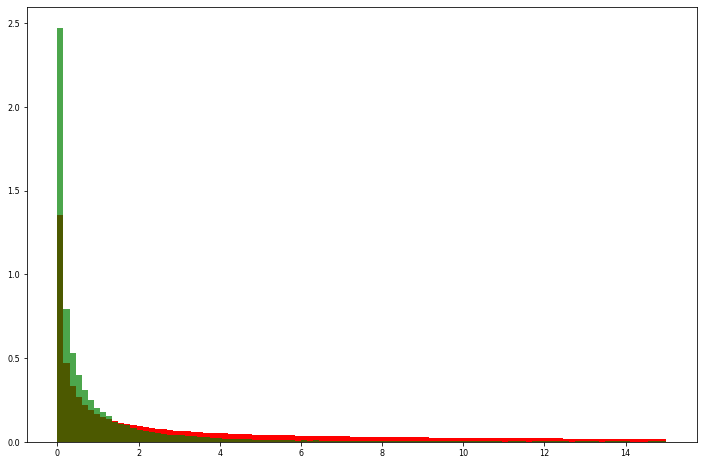

In [26]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(df['v0_chi2'].loc[df['trueLa'] == 0], bins = 100, range = (0, 15), color = "red", density=1);
ax.hist(df['v0_chi2'].loc[df['trueLa'] == 1], bins = 100, range = (0, 15), color = "green", alpha = 0.7, density=1);

In [27]:
for i in np.linspace(0,5,100):
    a=(df['v0_chi2'].loc[df['trueLa'] == 1] > i).sum()/(df['v0_chi2'].loc[df['trueLa'] == 0] > i).sum()
    print(a, i)

0.019949470745909574 0.0
0.017554918009818562 0.050505050505050504
0.016523464176007936 0.10101010101010101
0.015718205557831988 0.15151515151515152
0.015086991209898662 0.20202020202020202
0.014470924848380336 0.25252525252525254
0.013988236515753871 0.30303030303030304
0.013497292894337468 0.35353535353535354
0.013058531176288612 0.40404040404040403
0.01264285614682335 0.45454545454545453
0.012251492004516515 0.5050505050505051
0.011885468885630864 0.5555555555555556
0.011572612457868399 0.6060606060606061
0.011261731509553449 0.6565656565656566
0.010966807544889563 0.7070707070707071
0.01067391335425259 0.7575757575757576
0.010395534530799581 0.8080808080808081
0.010139031369547172 0.8585858585858586
0.009893513991384505 0.9090909090909091
0.009665084074231046 0.9595959595959596
0.00945503167790919 1.0101010101010102
0.009244708901287755 1.0606060606060606
0.009039506988442803 1.1111111111111112
0.008831583429354396 1.1616161616161615
0.008624441252290348 1.2121212121212122
0.008445

We cut at 3 and up

In [28]:
cutchi2=3
df = df.loc[df['v0_chi2'] < cutchi2]

In [29]:
current_signal, current_background = df['trueLa'].sum(), (df['trueLa'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")



The total amount of signal events is:   67521 
and the amount of background events is: 2377509
Signal is 2.76 %
Signal removed: 10664 
Background removed: 6452448


### CosTheta

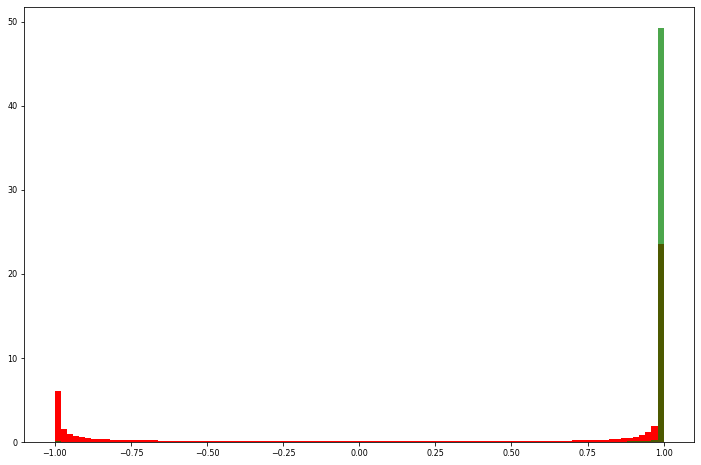

In [30]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(df['cosTheta'].loc[df['trueLa'] == 0], bins = 100, range = (-1, 1), color = "red", density=1);
ax.hist(df['cosTheta'].loc[df['trueLa'] == 1], bins = 100, range = (-1, 1), color = "green", alpha = 0.7, density=1);

In [31]:
cutcos=0.9995
(df['cosTheta'].loc[df['trueLa'] == 0] < cutcos).sum()

1585388

Set cut at 0.9995

In [32]:
df = df.loc[df['cosTheta'] > 0.9995]

In [33]:
current_signal, current_background = df['trueLa'].sum(), (df['trueLa'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")

The total amount of signal events is:   62558 
and the amount of background events is: 792119
Signal is 7.32 %
Signal removed: 15627 
Background removed: 8037838


### Lambda mass

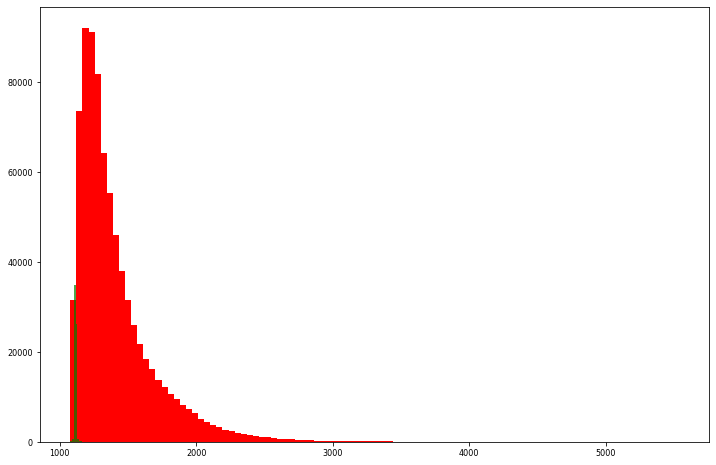

In [34]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.hist(df['v0_la_mass'].loc[df['trueLa'] == 0], bins = 100, color = "red");
ax.hist(df['v0_la_mass'].loc[df['trueLa'] == 1], bins = 100, color = "green", alpha = 0.7);

In [35]:
mu, std=df['v0_la_mass'].loc[df['trueLa'] == 1].mean(), df['v0_la_mass'].loc[df['trueLa'] == 1].std()
df['v0_la_mass'].loc[df['trueLa'] == 1].describe()

count    62558.000000
mean      1116.585083
std         10.310363
min       1078.602295
25%       1114.213531
50%       1116.105164
75%       1118.144257
max       2343.993408
Name: v0_la_mass, dtype: float64

We make a n sigma cut, so 1116,58 +/- n*10,3

In [36]:
n=4
(abs(df['v0_la_mass'].loc[df['trueLa'] == 1] - mu) > n * std).sum()

150

In [37]:
df = df.loc[abs(df['v0_la_mass'] - mu) < n * std]

In [38]:
current_signal, current_background = df['trueLa'].sum(), (df['trueLa'] == 0).sum()
print(f"The total amount of signal events is:   {current_signal} \nand the amount of background events is: {current_background}")

print("Signal is {:.2f} %".format(current_signal/(current_background + current_signal) * 100))

print(f"Signal removed: {total_signal - current_signal} \nBackground removed: {total_background - current_background}")

The total amount of signal events is:   62408 
and the amount of background events is: 87691
Signal is 41.58 %
Signal removed: 15777 
Background removed: 8742266


## Try plot after cuts

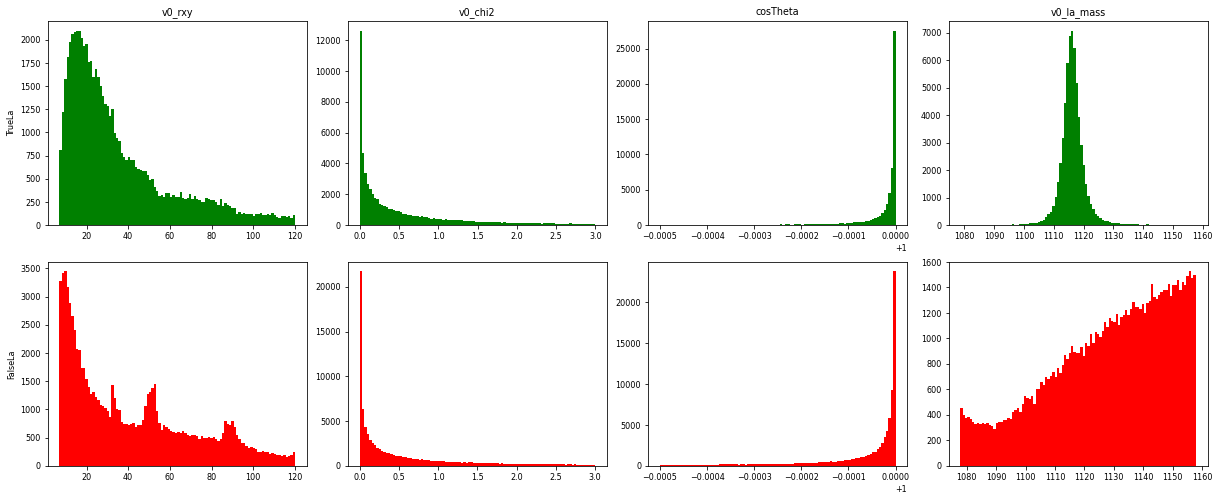

In [39]:
fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize = (17, 7))

plot_values = "v0_rxy v0_chi2 cosTheta v0_la_mass".split(" ") # Values to plot 
trueLa = df["trueLa"].astype(bool) # Identify true/false for Ks 

for i, col in enumerate(plot_values):
    ax[0][i].set_title(col)
    ax[0][i].hist(df[col].loc[trueLa], bins = bins, color = "green")
    ax[1][i].hist(df[col].loc[trueLa.apply(lambda x: not x)], bins = bins, color = "red")
    
ax[0][0].set_ylabel("TrueLa")
ax[1][0].set_ylabel("FalseLa")

fig.tight_layout()

In [40]:
cuts={'v0_rxy': (cutlow, cutup), 'v0_chi2': cutchi2, 'cosTheta': cutcos, 'v0_la_mass': (mu, std, n)}

In [51]:
import dill, pickle
with open('cuts_la.dat', 'wb') as handle:
    pickle.dump(cuts, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [52]:
with open('cuts_la.dat', 'rb') as handle:
    b = pickle.load(handle)
b

{'v0_rxy': (7, 120),
 'v0_chi2': 3,
 'cosTheta': 0.9995,
 'v0_la_mass': (1116.5851, 10.310363, 4)}